In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("TriNit/Crop_recommendation.csv")
df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [3]:
df_ph = df.copy()
df_ph

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
df["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [5]:
df_ph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
Xph = df_ph.drop(columns=["ph","label"],axis=1)
yph= df_ph["ph"]
from sklearn.model_selection import train_test_split
Xph_train,Xph_test,yph_train,yph_test = train_test_split(Xph,yph,test_size=0.2)

In [7]:
Xph_train[:10]

,N,P,K,temperature,humidity,rainfall
250,43,79,79,19.407517,18.980305,80.250646
1006,90,92,55,27.009321,80.185468,97.325317
192,76,51,18,26.169859,71.962466,79.849254
1547,25,143,200,23.804363,92.804416,100.619254
450,1,66,23,19.543172,56.928314,173.168657
1814,19,15,34,26.296449,99.658092,215.919505
1699,31,26,9,11.698946,93.256389,103.200599
1003,86,76,54,29.315908,80.115857,90.109781
483,39,57,19,29.323796,45.932484,165.411337
595,4,59,22,29.337434,49.003231,42.440543


### For Ph

In [8]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
model={
    "Ridge":Ridge().fit(Xph_train,yph_train),
    "Lasso":Lasso().fit(Xph_train,yph_train),
    "ElasticNet":ElasticNet().fit(Xph_train,yph_train),
    "svm SVR":svm.SVR().fit(Xph_train,yph_train),
    "Random Forest": RandomForestRegressor(n_estimators=100).fit(Xph_train,yph_train)
}

# Check the score of the model(on the test set)
scores={
    "Ridge":model["Ridge"].score(Xph_test,yph_test),
    "Lasso":model["Lasso"].score(Xph_test,yph_test),
    "ElasticNet":model["ElasticNet"].score(Xph_test,yph_test),
    "svm SVR":model["svm SVR"].score(Xph_test,yph_test),
    "Random Forest":model["Random Forest"].score(Xph_test,yph_test)
}

scores

{'Ridge': 0.03393977652058677,
 'Lasso': 0.02899599357445659,
 'ElasticNet': 0.028124295229511986,
 'svm SVR': 0.24197075018776326,
 'Random Forest': 0.2765848714628162}

### For Humidity and Temperature

In [48]:
import json
import urllib.request


def get_weath(city):
    import json
    import urllib.request
    res = urllib.request.urlopen('http://api.openweathermap.org/data/2.5/weather?q=' +
                                city+'&appid=764197b2d0a6b547cda5451c97546cf4').read()
    json_data = json.loads(res)
    data = {
        "code": str(json_data['sys']['country']),
        "coor": str(json_data['coord']['lon'])+' '+str(json_data['coord']['lat']),
        "tem": str(json_data['main']['temp'])+'K',
        "tem1": int(json_data['main']['temp'])-273,
        "tem2": int(json_data['main']['feels_like'])-273,

        "pre": str(json_data['main']['pressure']),
        "hum": str(json_data['main']['humidity'])
    }
    return data

In [10]:
import pickle
pickle.dump(model["Random Forest"],open("PH.pkl","wb"))

### For Rainfall data

In [11]:
df_rain = pd.read_csv("TriNit/district wise rainfall normal.csv")
df_rain[550:600]
import pickle

# Save an existing Model to file
pickle.dump(df_rain,open("Crop_state.pkl","wb"))

In [12]:
df_rain.drop(["STATE_UT_NAME","Jan-Feb","Mar-May","Jun-Sep","Oct-Dec"],axis=1,inplace=True)

In [13]:
df_rain.head()

,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2
1,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7
2,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3
3,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8
4,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7


In [37]:
gh=np.array(df_rain)
def get_rainfall(dist,month_no):
    dist=dist.upper()
   
    for i in gh:
        if i[0]==dist:
            index=i
    return (index[month_no])
k=get_rainfall('lohit',3)
k

176.4

In [38]:
type(k)

float

In [15]:
monthDict={1:'JAN', 2:'FEB', 3:'MAR', 4:'APR', 5:'MAY', 6:'JUN', 7:'JUL', 8:'AUG', 9:'SEP', 10:'OCT', 11:'NOV', 12:'DEC'}

### For Rainfall data

In [16]:
def get_rainfall(dist,month_no):
    pass

## Predictions for Crop

In [17]:
X = df.drop("label",axis=1)
y= df["label"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [18]:
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

np.random.seed(42)
model_crop={
    "SVM":svm.SVC().fit(X_train.values,y_train.values),
    "KNN":NearestNeighbors().fit(X_train.values,y_train.values),
    "LinearSVC":LinearSVC().fit(X_train.values,y_train.values),
    "Random Forest":RandomForestClassifier().fit(X_train.values,y_train.values)
}

scores_crop={
    "SVM":model_crop["SVM"].score(X_test,y_test),
    "LinearSVC":model_crop["LinearSVC"].score(X_test,y_test),
    "Random Forest":model_crop["Random Forest"].score(X_test,y_test)
}

scores_crop

c:\Users\Deepak\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Deepak\anaconda3\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\Deepak\anaconda3\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(
c:\Users\Deepak\anaconda3\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


{'SVM': 0.9772727272727273,
 'LinearSVC': 0.6522727272727272,
 'Random Forest': 0.9954545454545455}

In [19]:
y_preds = model_crop["Random Forest"].predict(X_test)
y_preds[:5],X_test.shape

c:\Users\Deepak\anaconda3\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


(array(['maize', 'coffee', 'banana', 'muskmelon', 'kidneybeans'],
       dtype=object),
 (440, 7))

<AxesSubplot:>

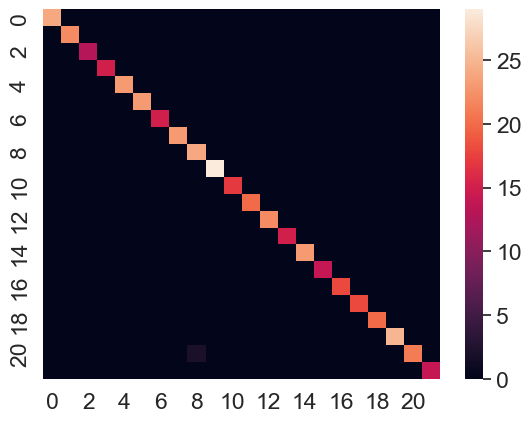

In [20]:
# Make our COnfusion Matrix more visual with seaborn's Heatmap()
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix 
conf_mat=confusion_matrix(y_test,y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        22
   blackgram       1.00      1.00      1.00        13
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        23
      coffee       1.00      1.00      1.00        23
      cotton       1.00      1.00      1.00        15
      grapes       1.00      1.00      1.00        23
        jute       0.92      1.00      0.96        24
 kidneybeans       1.00      1.00      1.00        29
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        22
   mothbeans       1.00      1.00      1.00        15
    mungbean       1.00      1.00      1.00        23
   muskmelon       1.00      1.00      1.00        14
      orange       1.00      1.00      1.00        18
      papaya       1.00    

In [22]:
state_N_P_K={'Andhra Pradesh ':{'N':3.7,'P':1.825,'K':1},'Karnataka':{'N':203,'P':1.425,'K':1},'Kerala':{'N':1.225,'P':0.625,'K':1},
             'Tamil Nadu':{'N':1.9,'P':0.775,'K':1},'Pondicherry':{'N':2.875,'P':0.9,'K':1},'Andman & Nicobar ':{'N':2.167,'P':1.7,'K':1},
             'Gujarat':{'N':6.3,'P':2.675,'K':1},'Madhya Pradesh ':{'N':8.875,'P':5.675,'K':1},'Chattisgarh':{'N':4.8,'P':2.375,'K':1},
             'Maharashtra':{'N':2.95,'P':1.8,'K':1},'Rajasthan':{'N':27.325,'P':11.625,'K':1},'Goa':{'N':1.6,'P':1.175,'K':1},
             'D & Haweli':{'N':15,'P':10.3,'K':1},'Haryana':{'N':27.075,'P':8.275,'K':1},'Punjab':{'N':23.85,'P':6.75,'K':1},'Uttar Pradesh':{'N':11.85,'P':3.825,'K':1},
             'Uttaranchal':{'N':9.85,'P':2.745,'K':1},'Himachal Pradesh':{'N':3.125,'P':0.975,'K':1},'Jammu and Kashmir':{'N':8.05,'P':3.025,'K':1},
             'Arunancha Pradesh ':{'N':5.73,'P':2.367,'K':1},'Bihar ':{'N':6.95,'P':1.8,'K':1},'Jharkhand':{'N':7.45,'P':3.825,'K':1},
             'Orissa':{'N':3.65,'P':1.8,'K':1},'West Bengal':{'N':1.85,'P':1.15,'K':1},'Assam':{'N':1.9,'P':0.825,'K':1},'Tripur':{'N':2.975,'P':1.2,'K':1},'Manipur':{'N':15.175,'P':2.35,'K':1},
             'Meghalaya':{'N':6.9,'P':2.75,'K':1},'Mizoram ':{'N':1.9,'P':1.867,'K':1},'Nagaland':{'N':3.825,'P':3.233,'K':1},
             'Delhi':{'N':2.7,'P':1,'K':1},'Sikkim':{'N':0.688,'P':0.38,'K':1},'Chandigarh':{'N':25.4625,'P':7.5125,'K':1}}

In [23]:
def N_P_K(state):
    return state_N_P_K[state]["N"],state_N_P_K[state]["P"],state_N_P_K[state]["K"]

In [24]:
len(state_N_P_K)

33

In [25]:
n,p,k = N_P_K("Himachal Pradesh")
n,p,k

(3.125, 0.975, 1)

In [26]:
def make_predictions(n,p,k,temp,humid,rainfall):
    arr_ph =[[n,p,k,temp,humid,rainfall]]
    arr_ph = np.array(arr_ph)
    ph = model["Random Forest"].predict(arr_ph)

    arr =[[n,p,k,temp,humid,8.1,rainfall]]
    arr = np.array(arr)
    q = model_crop["Random Forest"].predict(arr)
    return q

In [49]:
th=get_weath("dahod")
temperature,humidity = th["tem1"],float(th["hum"])
temperature,humidity,type(humidity),type(temperature)

(20, 20.0, float, int)

In [28]:
pred = make_predictions(74,39,51,temperature,humidity,990) # type:ignore
print(pred)

['rice']


In [29]:
import pickle

# Save an existing Model to file
pickle.dump(model_crop["Random Forest"],open("Crop_NIT.pkl","wb"))